<a href="https://colab.research.google.com/github/faezehmontazeri/IPM-AISummer2023/blob/main/Sohrevardi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [2]:
#from __future__ import print_function, absolute_import, division, unicode_literals

#import appdirs
#import argparse
#import getpass
#import hashlib
#import json
#import os
#import requests
#import shutil
#import stat

#from builtins import input

#import tensorflow.contrib.eager as tfe

#Eager execution is enabled by default in version 2.x You can check that by using tf.executing_eagerly()
#It should return True.
#If you are having version less then 2.0 then it can be enabled by using tf.enable_eager_execution()
tf.executing_eagerly()
#Eager enabled by default in tf2, you do can disable it as below
#tf.compat.v1.disable_eager_execution()

#!wget https://www.cityscapes-dataset.com/file-handling/?packageID=1
#file_id = '1-7pEZa3O5UTDjH3L6F4ZZBjxMnRgpwEL'
#url = 'https://drive.google.com/uc?id={}'.format(file_id)

#!wget 'https://drive.google.com/open?id=1-7pEZa3O5UTDjH3L6F4ZZBjxMnRgpwEL&authuser=0'
#'https://drive.google.com/file/d/1-7pEZa3O5UTDjH3L6F4ZZBjxMnRgpwEL'
#https://doc-0g-4g-docs.googleusercontent.com/docs/securesc/rgc31q317spmabsa7dm8q0te1a943j7q/ph2rh8qrql13hoadj9jsvupvpp1ro7av/1694785575000/13870146594497830143/10510790426494910345Z/1-7pEZa3O5UTDjH3L6F4ZZBjxMnRgpwEL?e=download&uuid=c34f927e-e26e-42fb-bb89-20b985ad2b0e&nonce=va8235fjkja3u&user=10510790426494910345Z&hash=ohpdppm05n9t0ai81rknh8med4q2tupl
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
!pip install gluoncv[full] mxnet>=1.6.0
#pip install gluoncv mxnet-cu110>=1.6.0 --upgrade

In [4]:
!pwd
url = 'gdrive/MyDrive/ColabNotebooks/gtFine_trainvaltest.zip'
!unzip 'gdrive/MyDrive/ColabNotebooks/gtFine_trainvaltest.zip'
#gtFine_trainvaltest.zip

Streaming output truncated to the last 5000 lines.
  inflating: gtFine/test/berlin/berlin_000117_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000114_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000434_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000483_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000254_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000490_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000448_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000099_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000068_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000288_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000409_00001

In [ ]:
!pip install cityscapesscripts

In [ ]:
!pip install cityscapesscripts[gui]

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image , ImageOps
import matplotlib.pyplot as plt

['monchengladbach', 'aachen', 'bochum', 'jena', 'hanover', 'hamburg', 'tubingen', 'ulm', 'krefeld', 'dusseldorf', 'darmstadt', 'bremen', 'zurich', 'stuttgart', 'strasbourg', 'weimar', 'erfurt', 'cologne']


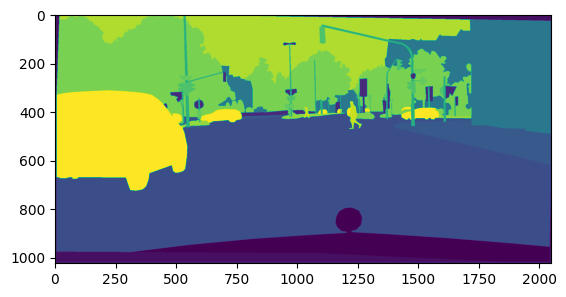

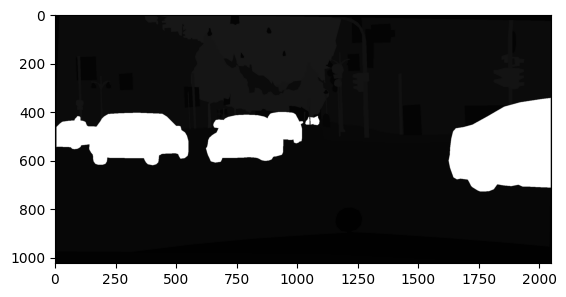

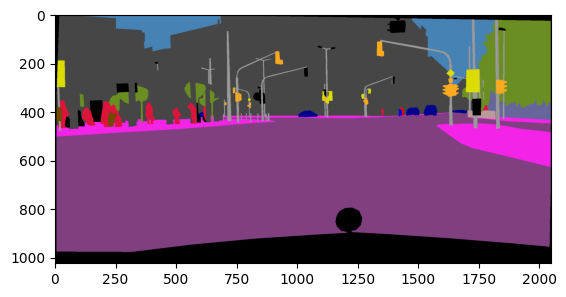

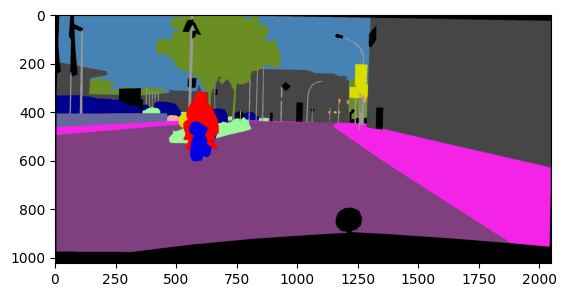

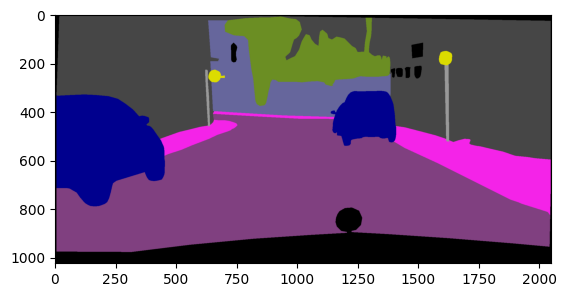

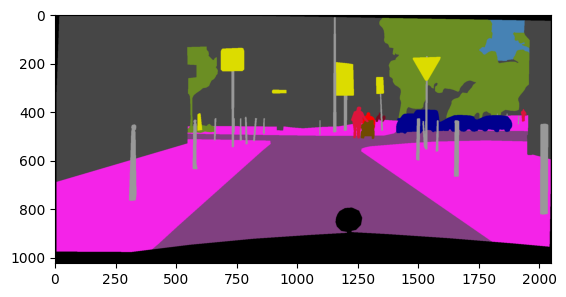

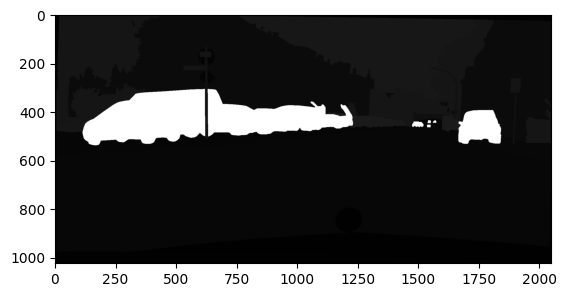

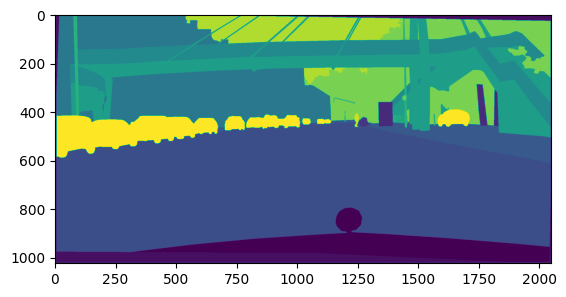

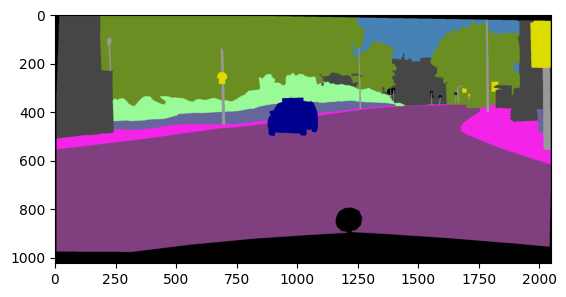

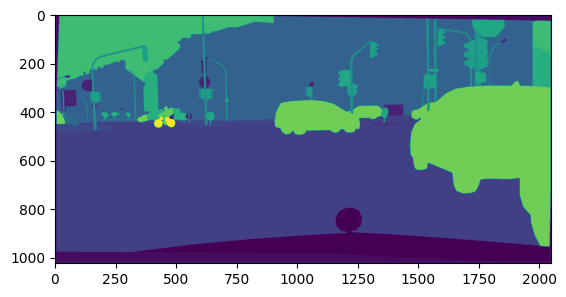

In [6]:
x = list()
y = list()

#@markdown > The number of images to load from the dataset. By default 4 images are loaded.
num_images = 10 #@param {type: "number" }
num = 1
image_train_dir = 'gtFine/train'
image_train_foldernames = os.listdir( image_train_dir )
print(image_train_foldernames )
foldersSize =len(image_train_foldernames)

for foldername in image_train_foldernames[ 0 : foldersSize-1 ]:
  folderPath = os.path.join(image_train_dir, foldername)
  image_train_filenames = os.listdir(folderPath)
  fileSize = len(image_train_filenames)
  for filename in image_train_filenames[0: fileSize-1]:
	  if filename.endswith('.json'):
	   continue
	  if num>num_images :
	   break
	  num +=1
	  image = Image \
		  .open(os.path.join(folderPath, filename))
	  plt.imshow(image)
	  plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from PIL import Image , ImageOps

x = list()
y = list()

#@markdown > The number of images to load from the dataset. By default 400 images are loaded.
num_images = 400 #@param {type: "number" }

image_train_dir = 'gtFine/train'
image_train_filenames = os.listdir( image_train_dir )
print(image_train_filenames )
for filename in image_train_filenames[ 0 : 100 ]:
	image = Image \
		.open(os.path.join( image_dir, filename))
	x.append( np.asarray( ImageOps.crop( image , ( 0 , 0 , 256 , 0 ) ).resize( ( 128, 128 )) ) )
	y.append(np.asarray( ImageOps.crop(image, (256, 0, 0, 0)).resize( ( 128 , 128 ) ) ))

x = np.array( x ) / 255
y = np.array( y )

train_features, test_features, train_labels, test_labels = train_test_split(np.array(x), np.array(y),
																					test_size=0.4)
#@markdown > The batch size for the dataset.
batch_size = 5  #@param {type: "number"}

train_dataset = tf.data.Dataset.from_tensor_slices( ( train_features , train_labels ) )
train_dataset = train_dataset.shuffle( 1024 ).batch( batch_size )
test_dataset = tf.data.Dataset.from_tensor_slices( ( test_features , test_labels ) )
test_dataset = test_dataset.shuffle( 1024 ).batch( batch_size )


In [ ]:
import tensorflow_datasets as tfds
ds = tfds.load('cityscapes', split='train', shuffle_files=True, data_dir='gtFine')
#'gdrive/MyDrive/ColabNotebooks/gtFine_trainvaltest.zip'
assert isinstance(ds, tf.data.Dataset)
print(ds)

AssertionError: ignored

In [ ]:
from mxnet.base import data_dir
import tensorflow_datasets as tfds
dataset = 'cityscapes'
builder = tfds.builder(dataset, data_dir='gtFine')

#print(tfds.download.DownloadConfig.manual_dir)
print(builder.data_path)
builder.download_and_prepare()

gtFine/cityscapes/semantic_segmentation/1.0.0


AssertionError: ignored

In [ ]:
!cp gdrive/MyDrive/ColabNotebooks/gtFine_trainvaltest.zip ~/tensorflow_datasets/downloads/manual/
#mv leftImg8bit_trainvaltest.zip ~/tensorflow_datasets/downloads/manual/
#/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/datasets/cityscapes

/bin/bash: line 1: copy: command not found


In [ ]:
!python Cityscapes.py

In [ ]:
from gluoncv.data import CitySegmentation
train_dataset = CitySegmentation(split='train')
val_dataset = CitySegmentation(split='val')
print('Training images:', len(train_dataset))
print('Validation images:', len(val_dataset))

RuntimeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [ ]:
ds = tfds.load('cityscapes', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

In [ ]:
#Functions to Read Image and Split Them
def _read_to_tensor(fname, output_height=256, output_width=512, normalize_data=False):
    '''Original images are 256 x 512 x 3. Left half is original image, right is semantic seg'''
    img_strings = tf.read_file(fname)
    imgs_decoded = tf.image.decode_jpeg(img_strings)
    output = tf.image.resize_images(imgs_decoded, [output_height, output_width])
    if normalize_data:
        output = (output - 128) / 128
    return output

def _get_left_img_half(inp, width=256):
    return inp[:, :width, :]

def _get_right_img_half(inp, width=256):
    return inp[:, width:, :]

In [ ]:
#Get List of Files and Apply Functions Above to Create Dataset
#img_dir = '../input/cityscapes_data/cityscapes_data/train'
img_dir = 'gtFine/train'
file_list = os.listdir(img_dir)
img_paths = [os.path.join(img_dir, fname) for fname in file_list]

# Start with a dataset of directory names.
output_height = 256
output_width = 256
my_data = tf.data.Dataset.from_tensor_slices(img_paths)
img_tensors = my_data.map(_read_to_tensor)
left_imgs = img_tensors.map(_get_left_img_half)
right_imgs = img_tensors.map(_get_right_img_half)

AttributeError: ignored

In [ ]:
#Simple Demo That The Images Have Been Read

#left_batches = tfe.Iterator(left_imgs)  # outside of TF Eager, we would use make_one_shot_iterator
left_batches = tf.keras.preprocessing.image.Iterator(left_imgs)
#right_batches = tfe.Iterator(right_imgs)
right_batches = tf.keras.preprocessing.image.Iterator(right_imgs)
n_images_to_show = 5

for i in range(n_images_to_show):
    left_img = left_batches.next().numpy().astype(np.uint8)
    right_img = right_batches.next().numpy().astype(np.uint8)
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(left_img)
    fig.add_subplot(1,2,2)
    plt.imshow(right_img)
    plt.show()

NameError: ignored